# Ordering
- Add ordering to a plot for better visualization

In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(ggthemes)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### Load "worldcup" Dataset

In [2]:
worldcup <- read_csv("Data/worldcup.csv")

worldcup <- worldcup %>%
  select(player_name, everything()) %>%
  rename(Name = player_name)

head(worldcup)

Parsed with column specification:
cols(
  Team = col_character(),
  Position = col_character(),
  Time = col_integer(),
  Shots = col_integer(),
  Passes = col_integer(),
  Tackles = col_integer(),
  Saves = col_integer(),
  player_name = col_character()
)


Name,Team,Position,Time,Shots,Passes,Tackles,Saves
Abdoun,Algeria,Midfielder,16,0,6,0,0
Abe,Japan,Midfielder,351,0,101,14,0
Abidal,France,Defender,180,0,91,6,0
Abou Diaby,France,Midfielder,270,1,111,5,0
Aboubakar,Cameroon,Forward,46,2,16,0,0
Abreu,Uruguay,Forward,72,0,15,0,0


### Plot Mean Time of players for each country in worldcup 2010
- Default will be ordered alphabetically

In [3]:
worldcup %>%
  group_by(Team) %>%
  summarize(Mean_Time = mean(Time)) %>%
  head()

Team,Mean_Time
Algeria,164.0000
Argentina,247.5000
Australia,151.0526
Brazil,259.5263
Cameroon,148.5000
Chile,195.3500


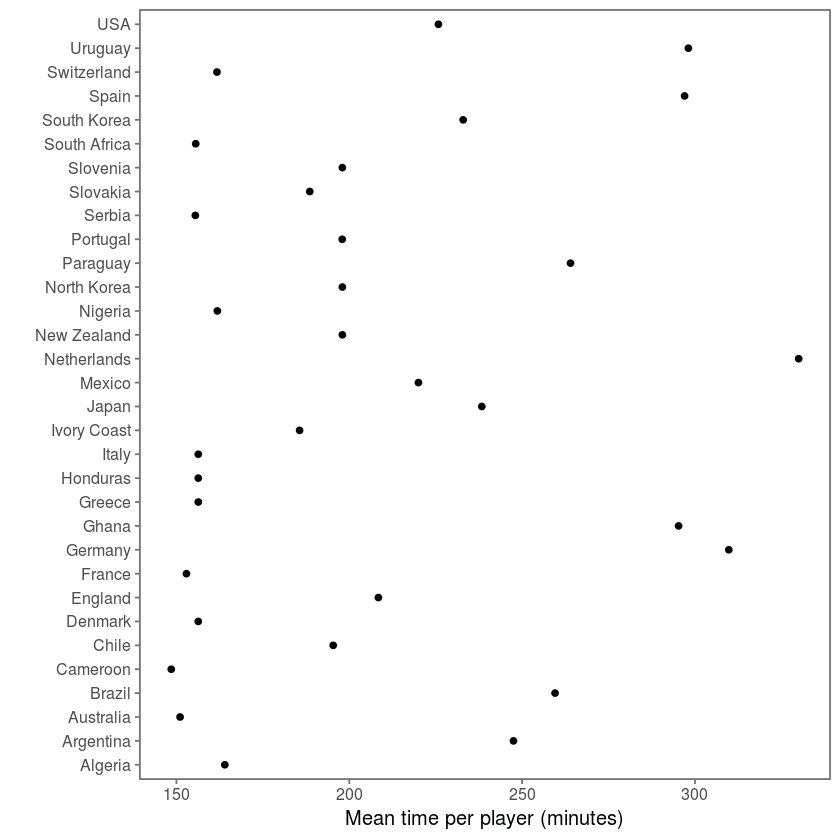

In [4]:
worldcup %>%
  group_by(Team) %>%
  summarize(Mean_Time = mean(Time)) %>%
  ggplot() +
  geom_point(aes(x = Mean_Time, y = Team)) +
  theme_few() +
  xlab("Mean time per player (minutes)") +
  ylab("")

### Plot Mean Time of players for each country in worldcup 2010
- Arrange by Mean_time using arrange() function
- Re-order and re-set the Team factors, and factor levels before plotting
- Teams will be re-set to factors by ascending order based on the Mean_Time

In [5]:
worldcup %>%
  group_by(Team) %>%
  summarize(Mean_Time = mean(Time)) %>%
  arrange(Mean_Time) %>%
  mutate(Team = factor(Team, levels = Team)) %>%
  head()

Team,Mean_Time
Cameroon,148.5000
Australia,151.0526
France,152.8947
Serbia,155.4737
South Africa,155.5789
Denmark,156.3158


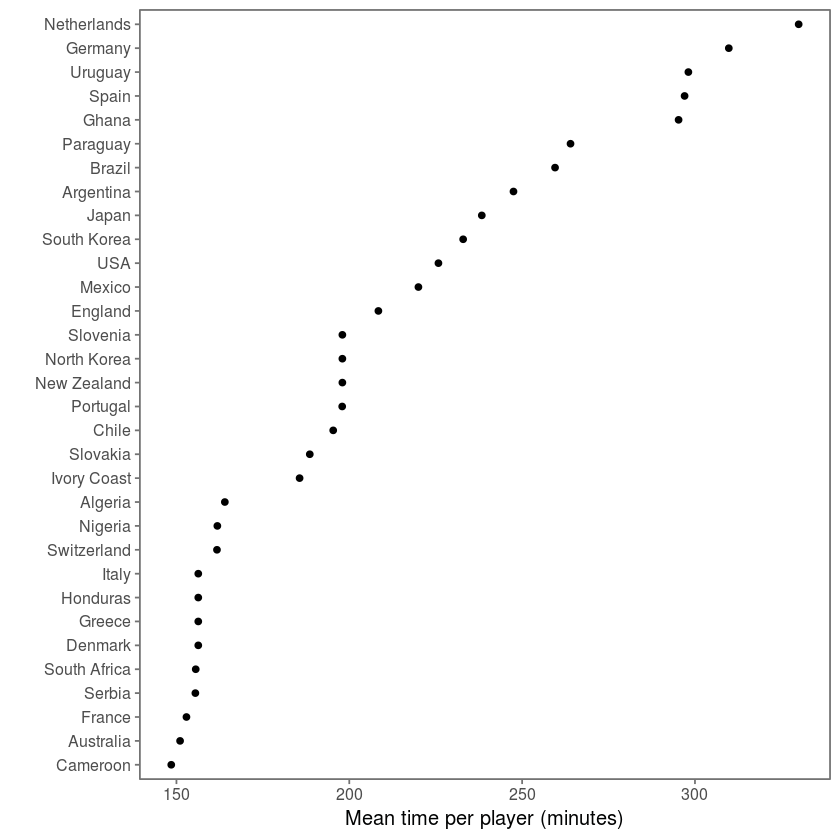

In [6]:
worldcup %>%
  group_by(Team) %>%
  summarize(Mean_Time = mean(Time)) %>%
  arrange(Mean_Time) %>%
  mutate(Team = factor(Team, levels = Team)) %>%
  ggplot() +
  geom_point(aes(x = Mean_Time, y = Team)) +
  theme_few() +
  xlab("Mean time per player (minutes)") +
  ylab("")

### Create a faceted Plot of Time vs Shots based on a Position ordered by Shots
- Add a new Variable Ave_Shots: Mean of Shots per Position 
- Add a new Variable Most_Shots as the max Shots per Position to highlight on the Plot (Boolen Varibale)

In [7]:
worldcup %>%
  select(Position, Time, Shots) %>%
  group_by(Position) %>%
  mutate(Ave_Shots = mean(Shots), Most_Shots = Shots == max(Shots)) %>%
  ungroup() %>%
  arrange(Ave_Shots) %>%
  mutate(Position = factor(Position, level = unique(Position))) %>% #levels should be unique
  head()

Position,Time,Shots,Ave_Shots,Most_Shots
Goalkeeper,270,0,0.02777778,FALSE
Goalkeeper,270,0,0.02777778,FALSE
Goalkeeper,360,0,0.02777778,FALSE
Goalkeeper,45,0,0.02777778,FALSE
Goalkeeper,540,0,0.02777778,FALSE
Goalkeeper,90,0,0.02777778,FALSE


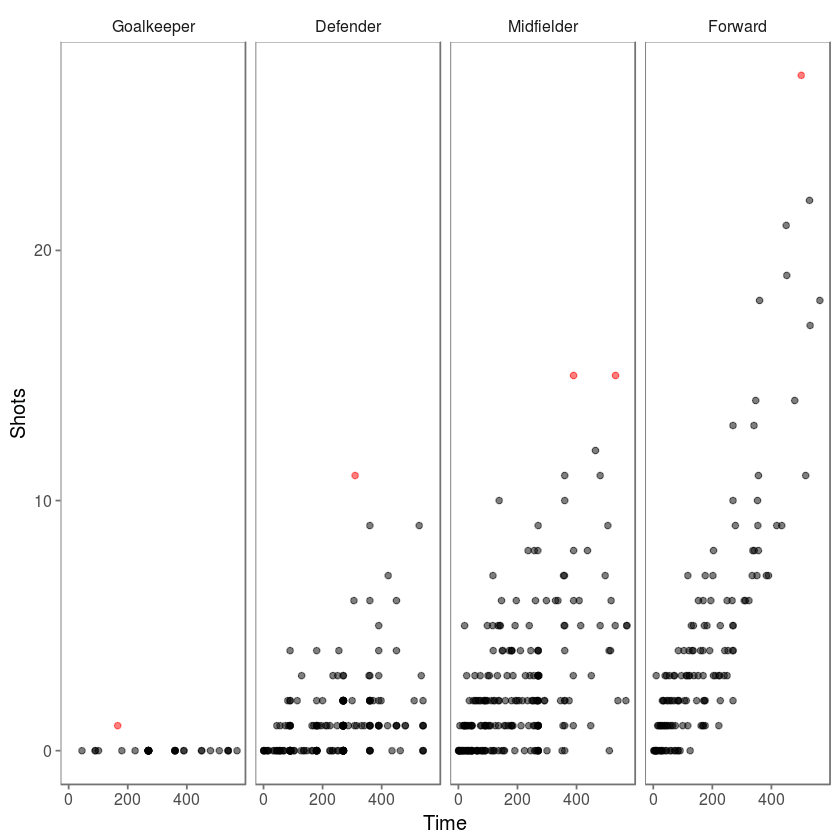

In [8]:
worldcup %>%
  select(Position, Time, Shots) %>%
  group_by(Position) %>%
  mutate(Ave_Shots = mean(Shots), Most_Shots = Shots == max(Shots)) %>%
  ungroup() %>%
  arrange(Ave_Shots) %>%
  mutate(Position = factor(Position, level = unique(Position))) %>%
  ggplot() +
  geom_point(aes(x = Time, y = Shots, color = Most_Shots), alpha = 0.5) +
  scale_color_manual(values = c("TRUE" = "red", "FALSE" = "black"), guide = FALSE) +
  facet_grid(. ~ Position) +
  theme_few()

<hr>

# Show Distribution of playing Time among players

### Step 1: Get the Data:
- Select Team and Time Variables from the "Worldcup" data
- Group data by Team
- Mutate a new Variable of Average Player Time within each team
- Mutate new Variable for Minimum and Maximum Time for each Team (will be used in the Line Segment Plot)
- Arrage order teams by Average Player Time
- Mutate to factor the Team Variable based on levels of the Team (should be unique)

In [9]:
data <- worldcup %>%
  select(Team, Time) %>%
  group_by(Team) %>%
  mutate(Ave_Time = mean(Time), Min_Time = min(Time), Max_Time = max(Time)) %>%
  arrange(Ave_Time) %>%
  ungroup() %>%
  mutate(Team = factor(Team, levels = unique(Team))) 

head(data)

Team,Time,Ave_Time,Min_Time,Max_Time
Cameroon,46,148.5,17,270
Cameroon,90,148.5,17,270
Cameroon,270,148.5,17,270
Cameroon,163,148.5,17,270
Cameroon,56,148.5,17,270
Cameroon,90,148.5,17,270


### Step 2: Plot the Time points
- Use geom_point() function with aes(x = Time, y = Team)

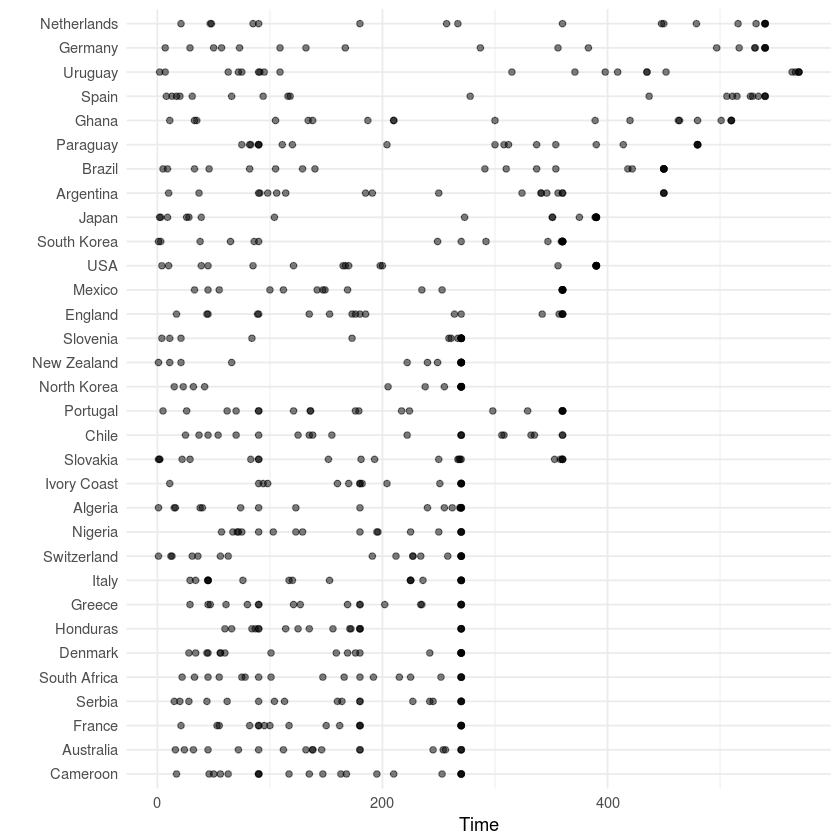

In [10]:
data %>%
  ggplot() +
  geom_point(aes(x = Time, y = Team), alpha = 0.5) +
  theme_minimal() +
  xlab("Time") +
  ylab("") 

### Step 2: Add the Line Segment first from Minimum Time to Maximum Time for each Country
- Use geom_segment() function to Plot a Line Segment 
  - x-axis: from x to xend: Min_Time to Max_Time
  - y-axis: from y to yend: Team to Team to get a straight horizontal Line

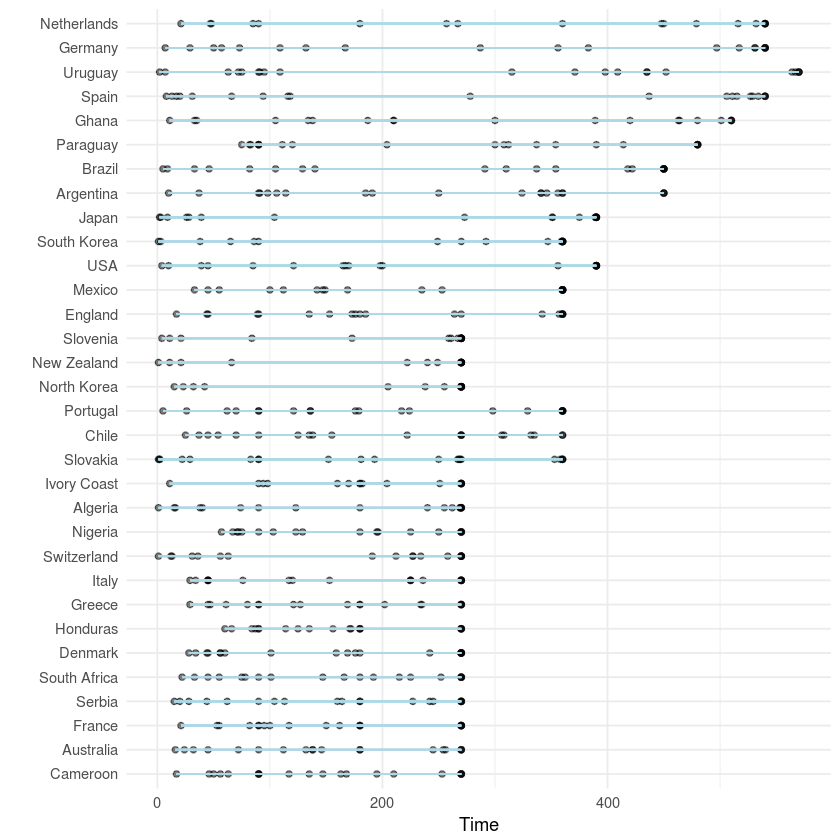

In [11]:
data %>%
  ggplot() +
  geom_point(aes(x = Time, y = Team), alpha = 0.5) +
  geom_segment(aes(x = Min_Time, xend = Max_Time, y = Team, yend = Team), alpha = 0.5, color = "lightblue") +
  theme_minimal() +
  xlab("Time") +
  ylab("")

### Step 4: Add the Average Time to the Plot
- Use geom_point() function with aes(aes(x = Ave_Time), size =2, color = "red", alpha = 0.5)
- Add geom_point after the geom_segment to have point on top of the line

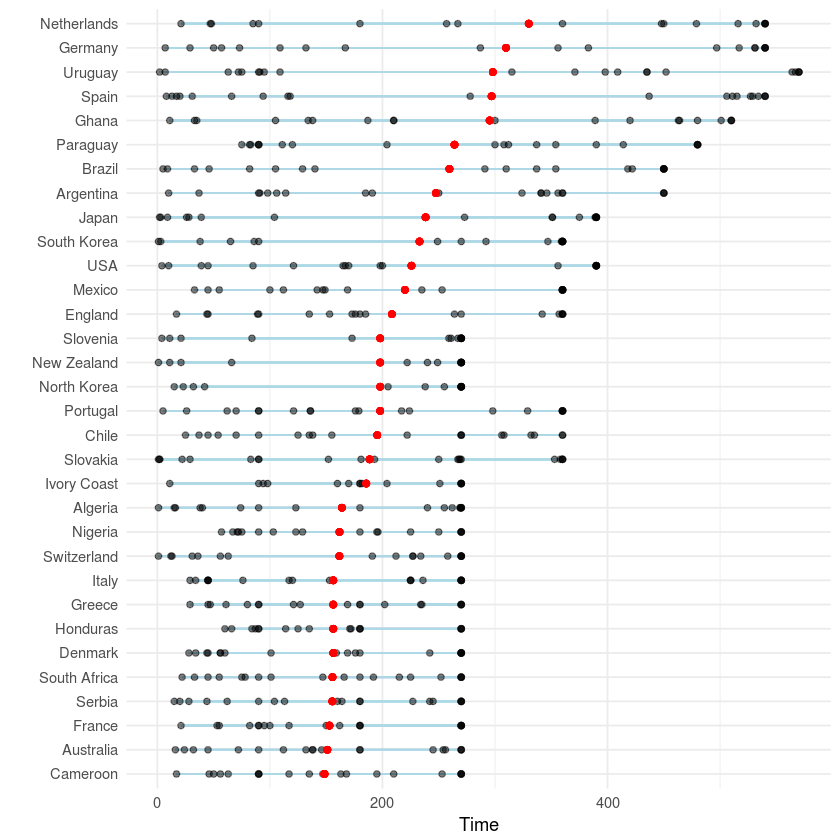

In [12]:
data %>%
  ggplot() +
  geom_segment(aes(x = Min_Time, xend = Max_Time, y = Team, yend = Team), alpha = 0.5, color = "lightblue") +
  geom_point(aes(x = Time, y = Team), alpha = 0.5) +
  geom_point(aes(x = Ave_Time, y = Team), size =1.5, color = "red", alpha = 0.5) +
  theme_minimal() +
  xlab("Time") +
  ylab("") 